# SNLP Assignment 2

Name 1: Rricha Jalota <br/>
Id 1: 7010592 <br/>
Email id 1: rrja00001 <br/>

Name 2: Pavle Markovic <br/>
Id 2: 7007913 <br/>
Email id 2: pama00002 <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for exercises 2 and 3. There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---


## Exercise 1 (1.5 + 1.5 = 3 points)

The perplexity of a model can also be defined as $2^{-\frac{1}{n} \sum^n_1 \log p(w_i|w_{i-1})}$. For the following exercise, use the log probabilities given this pretrained bigram language model. Tokenization is apparent from the tokens in the following table.

|A|B|log p(B\|A)|
|-|-|-|
|`The`|`man`|-1.8|
|`the`|`man`|-2.2|
|`the`|`post`|-2.7|
|`Man`|`the`|-5.1|
|`man`|`the`|-3.7|
|`man`|`shouted`|-2.9|
|`shouted`|`"`|-3.1|
|`post`|`!`|-3.1|
|`"`|`Man`|-1.9|
|`"`|`man`|-1.7|
|`!`|`"`|-1.2|
|`"`|`The`|-0.9|
|`"`|`the`|-1.2|

Assume probabilities not listed are $0^+$ (and the respective logarithm $-\infty$). For counting bigrams, consider your corpus as a circular structure i.e. include the bigram $(w_N, w_1)$ in your final counts. Therefore the weight of each bigram is $\frac{1}{|\text{words}|}$.

### 1.1 Lowercasing Input (1.5 points)

Compute the perplexity of the following two sentences (and show the steps).

```
The man shouted "Man the post!"
the man shouted "man the post!"
```

Is lowercasing the input always a good idea? What are the advantages and disadvantages?

### 1.2 Unknown Tokens (1.5 points)

Compute the perplexity of the following two sentences.

```
The man shouted "Man the stations!"
The man shouted "Man the the!"
```

Elaborate on the computed results. 2. Do you consider both sentences to be equally probable?

## Exercise 1 answers

### 1.1
- PP(The man shouted "Man the post!") = 5.73582099
    - First calculate $\sum^n_1 \log p(w_i|w_{i-1})$: (-1.8) + (-2.9) + (-3.1) + (-1.9) + (-5.1) + (-2.7) + (-3.1) + (-1.2) + (-0.9) = -22.7
    - Then calculate complete formula: $2^{-\frac{1}{9}(-22.7)}$ => $2^{\frac{22.7}{9}}$ => $2^{2.52}$ => 5.73582099
- PP(the man shouted "man the post!") = 5.35171022
    - First calculate $\sum^n_1 \log p(w_i|w_{i-1})$: (-2.2) + (-2.9) + (-3.1) + (-1.7) + (-3.7) + (-2.7) + (-3.1) + (-1.2) + (-1.2) = -21.8
    - Then calculate complete formula: $2^{-\frac{1}{9}(-21.8)}$ => $2^{\frac{21.8}{9}}$ => $2^{2.42}$ => 5.35171022
- In this case, the lowercased example yields better perplexity, however, it doesn't have to be the case in general. For instance, white can be last name and it would be better to leave it uppercased. It can be expected (depending of text of course) that white preveils as colour in train text rather then as last name, therefore, it can cause high perplexity for test texts where white is last name.
- Advantages of lowercasing are: 
    - Smaller vocabulary which yields better computation cost
    - Same words will be treated equally, regardless of position in a text (e.g. capitalize at the beginning and lowercased in the middle of a text)
- Disadvantages of lowercasing are:
    - Example above, some words/tokens should be left uppercased (e.g. last names)
    - Different languages treat words differently so that should be taken into account (e.g. nouns are uppercased in German)

### 1.2
- Both sentences have perplexity $\infty$, due to unknown bigrams, the stations and the the, respectively. Summation yields $-\infty$, resulting overall calculation to be $\infty$. Therefore, both sentences have same perplexity.
- However, these two sentences should not be treated equally probable since the combination _the the_ is not common (and probably grammatically correct), while _the stations_ is. Therefore, the first sentence should have smaller (better) perplexity.

## Exercise 2 (N-gram models) (1 + 2 = 3 points)

### 2.1

Consider the formula on Page 28 in Chapter 2. 

$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

To actually estimate these n-gram probabilities over a text corpus, we use **Maximum Likelihood Estimation (MLE)**. The estimate for the parameters of the MLE is obtained by getting counts from the corpus and then normalising them so they lie between 0 and 1.

Using this, state the empirical formula for finding the conditional probability of unigrams $P(w)$, bigrams $P(w_2|w_1)$, and trigrams $P(w_3|w_1,w_2)$ for a corpus of N words. We do not expect any mathematical proof here, but just the formula for finding the conditional probabilities from the words in the corpus using the shown equation as the starting point. (1 pt)


### 2.2 

Given the corpus `orient_express.txt`, find the unigram, bigram, and trigram probability distributions of the text using the formulae obtained in 2.1. Implement the function `find_ngram_probs` in the file `exercise_2.py`. For counting bigrams and trigrams, consider your corpus as a circular structure i.e. include the bigram $(w_N, w_1)$ and trigrams $(w_{N-1}, w_N, w_1)$ and $(w_{N}, w_1, w_2)$ in your final counts.

Using the probabilities you obtain, 
1. Plot the probabilities of the 20 most frequent unigrams 
2. For the most frequent unigram, plot the 20 most frequent bigrams starting with that unigram
3. For the most frequent bigram, plot the 20 most frequent trigrams starting with that bigram

Use the function `plot_most_frequent`. Briefly explain your observations (1-2 lines).

NOTE: You must preprocess the text (remove punctuation, special characters, lowercase, tokenise) before you create your n-gram model. **You are NOT allowed to use nltk or any other tokeniser for this purpose**. Write your own function called `preprocess` in `exercise_2.py`. (2 points)

## Exercise 2 answers

### 2.1
- For unigrams $P(w)$: $\frac{m}{n}$, where $m$ is count of occurences of the word $w$.
- For bigrams $P(w_2|w_1)$: $\frac{P(w_1,w_2)}{P(w_1)}$ => $\frac{k}{m}$, where $k$ is count of occurences of the word $w_2$ after the word $w_1$ in the text and $m$ is count of occurences of the word $w_1$ in the text.
- For trigrams $P(w_3|w_1, w_2)$: $\frac{P(w_1, w_2, w_3)}{P(w_1, w_2)}$ => $\frac{k}{m}$, where $k$ is count of occurences of the word $w_3$ after words $w_1$ and $w_2$ in that order in the text and $m$ is count of occurences of words $w_1$ and $w_2$ in that order in the text.

### 2.2
- **NOTE:** plot\_most\_frequent function is changed to accomodate task. Additional parameter _start_ is required to select starting words for the most frequent bigrams and trigrams. Also, the function return the most frequent n-gram to serve as _start_ for other calls.
- **Comment results**

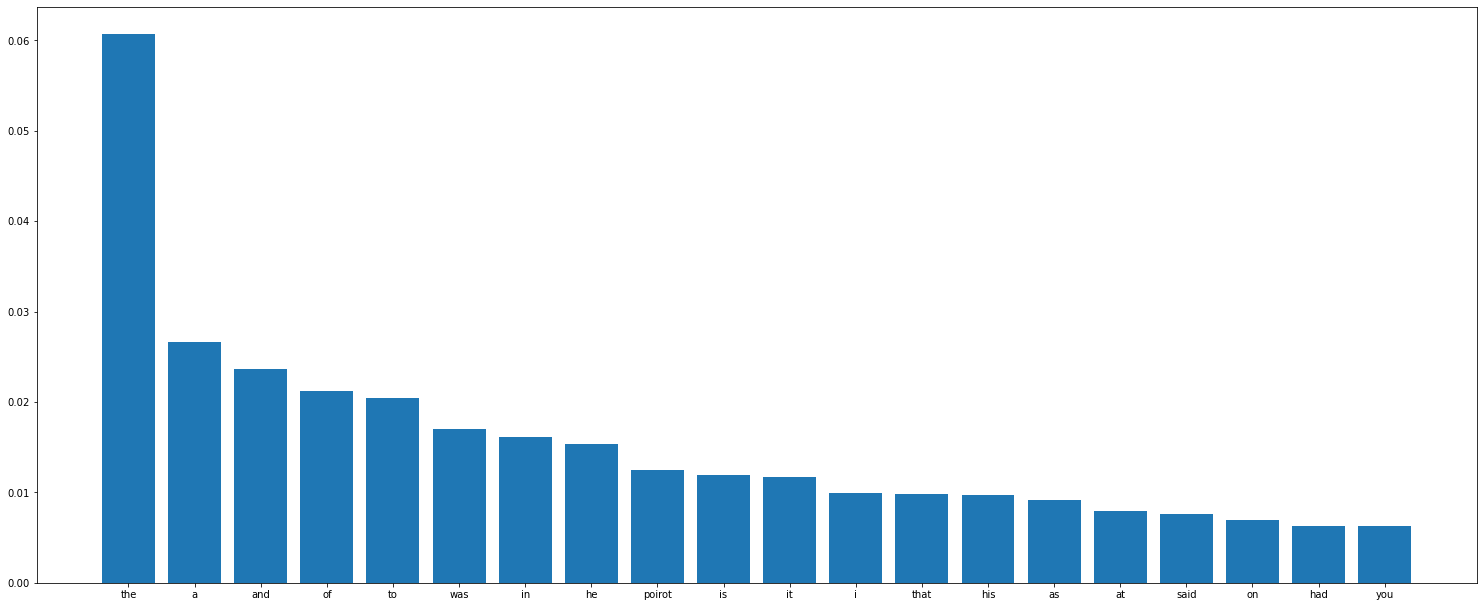

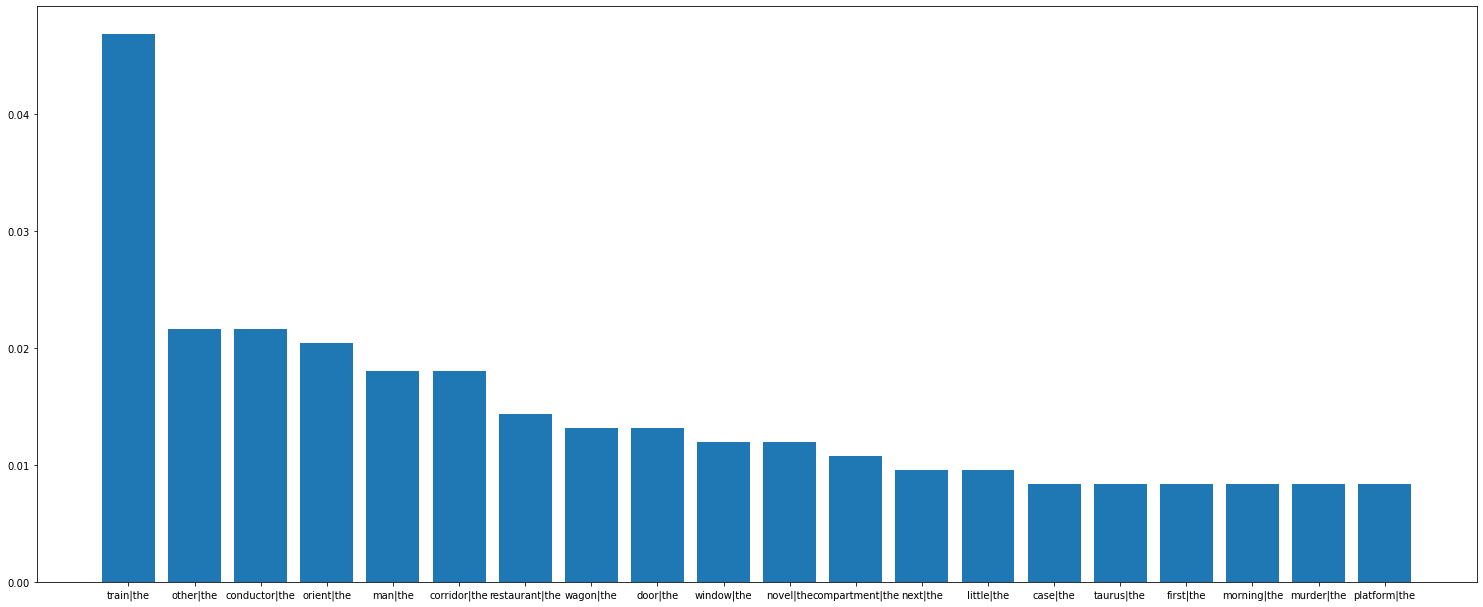

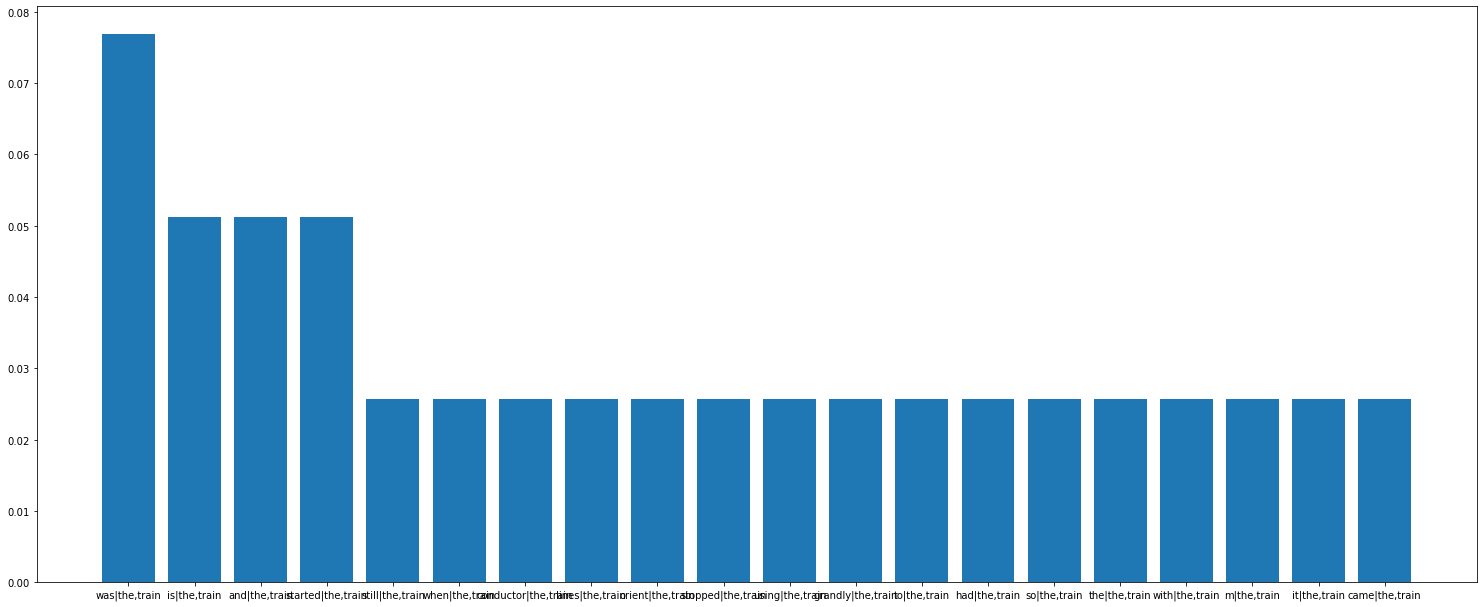

In [4]:
from importlib import reload
import exercise_2
exercise_2 = reload(exercise_2)

file = open("data/orient_express.txt", "r")
text = file.read()

# TODO: Preprocess text
tokens = exercise_2.preprocess(text)

# TODO: Find conditional probabilities of unigrams, bigrams, trigrams
"""
Modify your function call based on how you have defined find_ngram_probs 
in exercise_2.py
"""
unigrams = exercise_2.find_ngram_probs(tokens, model='unigram')
bigrams = exercise_2.find_ngram_probs(tokens, model='bigram')
trigrams = exercise_2.find_ngram_probs(tokens, model='trigram')

# TODO: Plot most frequent ngrams
"""
Modify the function signature as per your definition of plot_most_frequent 
in exercise_2.py
"""
start_bigram = exercise_2.plot_most_frequent(unigrams)
start_trigram = exercise_2.plot_most_frequent(bigrams, start_bigram)
start_fourgram = exercise_2.plot_most_frequent(trigrams, start_trigram)

## Exercise 3 (4 points)

### 3.1 

Read the corpus file again and apply the preprocessing steps from Exercise 2. Split the corpus into a train and test sections; the size of the test section should be 10% of the corpus. Do this by implementing the `train_test_split` function in `exercise_3.py`.  Then, train 3-, 2- and 1-gram language models with your implementation from Exercise 2 on the train section. You may change the parameters of the functions if you find it necessary, but the code should still be written in the .py file. (1 point)

In [39]:
from pathlib import Path
from importlib import reload
import exercise_3, exercise_2
exercise_3 = reload(exercise_3)
exercise_2 = reload(exercise_2)   

file = Path("./data/orient_express.txt").open('r')
text = file.read()

# TODO: apply tokenizer from exercise 2
tokenized = exercise_2.preprocess(text)

# TODO: split the corpus into a train corpus and a test corpus, with test_size=10%
train, test = exercise_3.train_test_split(tokenized, 0.1)

# TODO: train unigram, bigram, trigram LM using the method defined in exercise_2
# call each method as per your function definition

unigram_lm = exercise_2.find_ngram_probs(train, model='unigram')
bigram_lm = exercise_2.find_ngram_probs(train, model='bigram')
trigram_lm = exercise_2.find_ngram_probs(train, model='trigram')

### 3.2

Calculate relative frequencies for all three test corpora. Do this by implementing the function `relative_frequencies` in `exercise_3.py`. <br/>
Relative frequency is calculated as follows: <br/>
e. g. for bigrams, $ f(w_{i-1}, w_i) = \frac{N(w_{i-1}, w_i)}{N(\bullet,\bullet)}$, where $N( w_{i-1},w_i)$ is the count of the bigram and $N(\bullet,\bullet)$ is the total number of bigrams in the corpus. For consistency, you should include a bigram $(w_N, w_1)$, where $N$ is the length of the corpus (and likewise for trigrams) as you have done in 2.2. (0.5 points)

In [36]:
# TODO: calculate unigram, bigram, trigram relative frequencies
unigram_rfs = exercise_3.relative_frequencies(test)
bigram_rfs = exercise_3.relative_frequencies(test, model='bigram')
trigram_rfs = exercise_3.relative_frequencies(test, model='trigram')

### 3.3

Implement the perplexity calculation for all 3 language models in the function `pp`, and perform the calculation on the test section of the corpus. You should use the perplexity formula from slide 21, chapter 3:
\begin{equation}
  PP = 2^{-\sum_{w,h}f(w,h)\log_2 P(w|h)}
\end{equation}

* Can you simply apply the formula to the language model and the relative frequencies? What would happen if an ngram from the test set is absent in the train set?

* Why is it possible to calculate perplexity with this formula? How does it differ from the formula in exercise 1 of this sheet? 

(1.5 points)

In [37]:
# "Smoothing"
unigram_rfs = {unigram:rf for unigram, rf in unigram_rfs.items() if unigram in unigram_lm}
bigram_rfs = {bigram:rf for bigram, rf in bigram_rfs.items() if bigram in bigram_lm}
trigram_rfs = {trigram:rf for trigram, rf in trigram_rfs.items() if trigram in trigram_lm}

# TODO: compute perplexity for each LM
unigram_pp = exercise_3.pp(unigram_lm, unigram_rfs)
bigram_pp = exercise_3.pp(bigram_lm, bigram_rfs)
trigram_pp = exercise_3.pp(trigram_lm, trigram_rfs)

### 3.4 

Plot perplexity scores for all 3 language models. Do so by implementing the `plot_pps` function.
* Explain the differences between the language models. 
* Is it always a good idea to increase the history for n-gram based language models? What can happen if n is too large? (1 point)

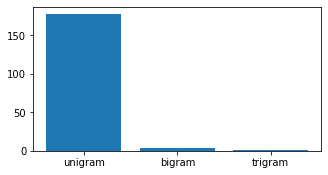

In [40]:
# TODO: plot
pps = [unigram_pp, bigram_pp, trigram_pp]
exercise_3.plot_pps(pps)

## Bonus (1.5 points)

Revisit exercise 1.

1. Come up with another metric (not language model) as an alternative to perplexity that could measure language model capabilities.
2. What are the advantages and disadvantages of such a metric in comparison to perplexity?
3. Compute your metric with respect to the four sentences (in exercise 1) and the provided language model.